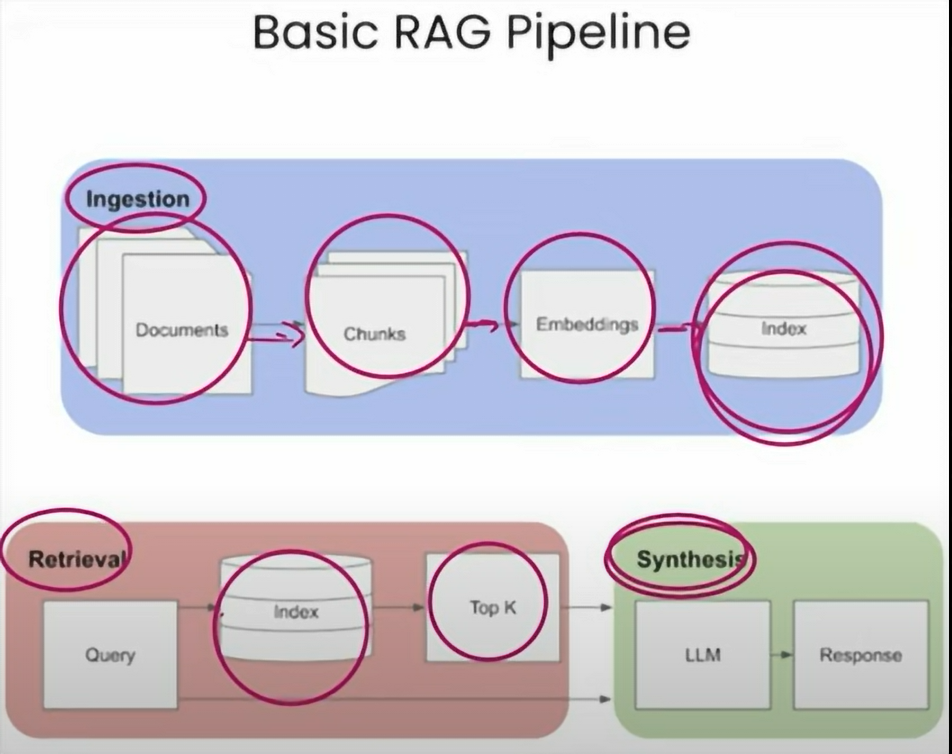

In [ ]:
corpus_of_docs = [
    "India won the ICC Cricket World Cup in 2011.",
    "MS Dhoni captained India to victory in the 2013 Champions Trophy.",
    "Virat Kohli became the captain of the Indian cricket team after 2014.",
    "Rohit Sharma is known for scoring multiple double centuries in ODIs.",
    "Ravichandran Ashwin is a leading spinner for India in Test cricket.",
    "India reached the semi-finals of the 2015 Cricket World Cup.",
    "India hosted the ICC World Twenty20 in 2016.",
    "Hardik Pandya emerged as a key all-rounder for India.",
    "Jasprit Bumrah is considered one of the best death bowlers.",
    "Kuldeep Yadav and Yuzvendra Chahal formed a successful spin duo.",
    "India won the Border-Gavaskar Trophy in Australia in 2018-19.",
    "Rishabh Pant became a prominent wicket-keeper batsman.",
    "India participated in the 2019 Cricket World Cup.",
    "Shreyas Iyer established himself in the middle order.",
    "Mohammed Shami has been a consistent performer with the ball.",
    "India played in the inaugural ICC World Test Championship final in 2021.",
    "Suryakumar Yadav rose to prominence in T20 international cricket.",
    "India reached the semi-finals of the 2022 T20 World Cup.",
    "Shubman Gill has been performing well in all formats.",
    "India hosted the 2023 Cricket World Cup and reached the final."
]

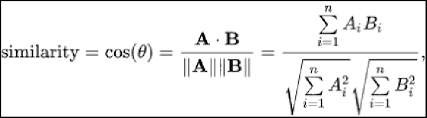

In [ ]:
user_query = 'India wins the T20 world cup last year'
document = 'This year Champions trophy won by India and India finished on position 1. '

In [ ]:
query_token = user_query.lower().split(' ')
document_token = document.lower().split(' ')

### Tokenize and Convert to lowercase

In [ ]:
query_token

['india', 'wins', 'the', 't20', 'world', 'cup', 'last', 'year']

In [ ]:
document_token

['this',
 'year',
 'champions',
 'trophy',
 'won',
 'by',
 'india',
 'and',
 'india',
 'finished',
 'on',
 'position',
 '1.',
 '']

### Create Counters for query and *document*

In [ ]:
from collections import Counter

In [ ]:
query_counter = Counter(query_token)
document_counter = Counter(document_token)

In [ ]:
query_counter

Counter({'india': 1,
         'wins': 1,
         'the': 1,
         't20': 1,
         'world': 1,
         'cup': 1,
         'last': 1,
         'year': 1})

In [ ]:
document_counter

Counter({'this': 1,
         'year': 1,
         'champions': 1,
         'trophy': 1,
         'won': 1,
         'by': 1,
         'india': 2,
         'and': 1,
         'finished': 1,
         'on': 1,
         'position': 1,
         '1.': 1,
         '': 1})

### Calculate Dot product

In [ ]:
dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() and document_counter.keys())

In [ ]:
dot_product

3

### Calculate Magnitudes

In [ ]:
import math

In [ ]:
query_magnitude = math.sqrt(sum(query_counter[token] **2 for token in query_counter))


document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

In [ ]:
query_magnitude

2.8284271247461903

In [ ]:
document_magnitude

4.0

### Calculate Cosine Similarity

In [ ]:
similarity = dot_product / (query_magnitude * document_magnitude) if (query_magnitude * document_magnitude) != 0 else 0

In [ ]:
similarity

0.2651650429449553

### Whole things in a function.

In [ ]:
from collections import Counter
import math

def cosine_similarity(user_query, document):
    """
    Calculates the cosine similarity between a user query and a document.

    Args:
        user_query (str): The user's query string.
        document (str): The document string.

    Returns:
        float: The cosine similarity score between the query and the document.
    """
    query_token = user_query.lower().split(' ')
    document_token = document.lower().split(' ')

    query_counter = Counter(query_token)
    document_counter = Counter(document_token)

    dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    query_magnitude = math.sqrt(sum(query_counter[token] **2 for token in query_counter))
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    similarity = dot_product / (query_magnitude * document_magnitude) if (query_magnitude * document_magnitude) != 0 else 0

    return similarity

In [ ]:
cosine_similarity(user_query,document)

0.2651650429449553

### Return Response

In [ ]:
def return_response(query,corpus_of_docs):
  similarities=[]
  for doc in corpus_of_docs:
    similarity = cosine_similarity(query,doc)
    similarities.append(similarity)
  return corpus_of_docs[similarities.index(max(similarities))]

In [ ]:
return_response("I love cricket",corpus_of_docs)

'India participated in the 2019 Cricket World Cup.'

# How you can configure LLM in your local system

1. By using the HuggingFace API (but will not use)
2. We will use Ollama

##### augment this response using ollama model

In [ ]:
prompt = """You are a helpful bot that provides information based on the provided context and user query.

Context: {relevant_document}

User Query: {user_input}

Based on the context, provide a concise and relevant answer to the user query. If the information is not available in the context, state that you cannot provide an answer based on the given information.
"""

In [ ]:
relevant_document = return_response(user_query,corpus_of_docs)

In [ ]:
url = " https://990bf140ca37.ngrok-free.app/api/generate"

In [ ]:
import requests,json
full_response=[]
user_input = 'India wins the T20 world cup last year'

data = {
    "model": "gpt-oss",
    "prompt": prompt.format(user_input = user_input, relevant_document = relevant_document)
}

headers = {'Content-Type':'application/JSON'}

response = requests.post(url,data=json.dumps(data),headers=headers,stream=True)


try:
  for line in response.iter_lines():
    if line:
      decoded_line = json.loads(line.decode('utf-8'))
      print(decoded_line['response'])
      full_response.append(decoded_line['response'])
finally:
  response.close()

print(''.join(full_response))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import requests, json

url = " https://77ab6bb8bac0.ngrok-free.app/api/generate"

data = {
    "model": "llama2",
    "prompt": "Write a short poem about AI and innovation."
}

headers = {"Content-Type": "application/json"}

response = requests.post(url, data=json.dumps(data), headers=headers, stream=True)

full_response = []

try:
    for line in response.iter_lines():
        if line:
            decoded_line = json.loads(line.decode("utf-8"))
            token = decoded_line.get("response", "")
            print(token, end="", flush=True)   # live streaming
            full_response.append(token)
finally:
    response.close()

print("\n\nFinal Response:", "".join(full_response))


JSONDecodeError: Expecting value: line 1 column 1 (char 0)